In [2]:
import numpy as np
from numpy import sum as arraysum
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf



In [9]:
df=pd.read_csv("Z:\R & D\ASLT Studies\Memmert Incubators\IN013_BS_FL_a.csv")

In [10]:
df.head(5)

,Point,Date / Time(GMT+12:00),Primary (° C): Ambient,Secondary (%): Humidity,Alarms
0,1,7/29/2019 9:52:09 AM,53.4,51.1,'Secondary High'
1,2,7/29/2019 9:57:09 AM,53.8,49.9,NaN
2,3,7/29/2019 10:02:09 AM,54.1,49.3,NaN
3,4,7/29/2019 10:07:09 AM,54.1,49.3,NaN
4,5,7/29/2019 10:12:09 AM,54.3,49.5,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4059 entries, 0 to 4058
Data columns (total 5 columns):
Point                      4059 non-null int64
Date / Time(GMT+12:00)     4059 non-null object
Primary (° C): Ambient     4059 non-null float64
Secondary (%): Humidity    4059 non-null float64
Alarms                     10 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 126.9+ KB


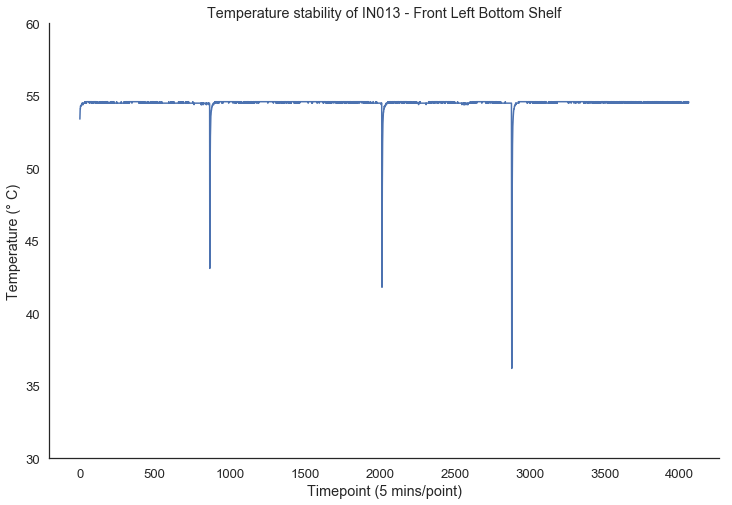

In [19]:
fig=plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.set_style('white')
sns.lineplot(data=df, x="Point", y="Primary (° C): Ambient")
ax=plt.gca()
ax.set_title("Temperature stability of IN013 - Front Left Bottom Shelf")
ax.set(xlabel = 'Timepoint (5 mins/point)', ylabel = 'Temperature (° C)', ylim=(30,60))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("13_BS_FL")
plt.rcParams["axes.labelsize"] = 24
plt.show()

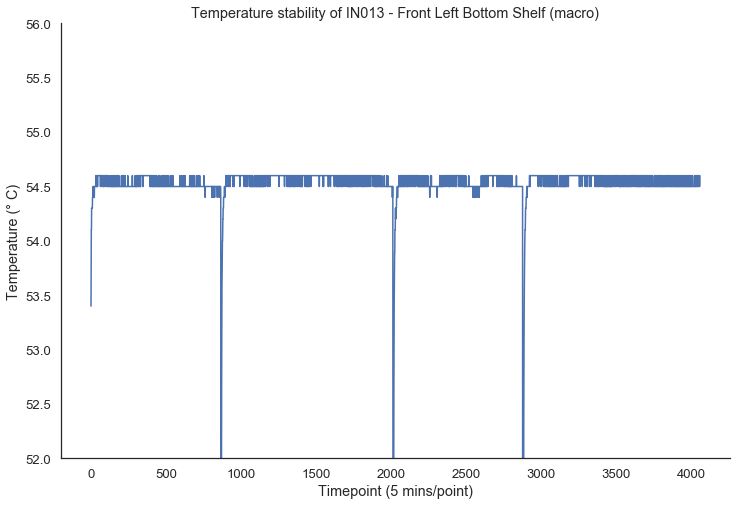

In [17]:
fig=plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.set_style('white')
sns.lineplot(data=df, x="Point", y="Primary (° C): Ambient")
ax=plt.gca()
ax.set_title("Temperature stability of IN013 - Front Left Bottom Shelf (macro)")
ax.set(xlabel = 'Timepoint (5 mins/point)', ylabel = 'Temperature (° C)', ylim=(52,56))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("13_BS_FL_a")
plt.rcParams["axes.labelsize"] = 18
plt.show()

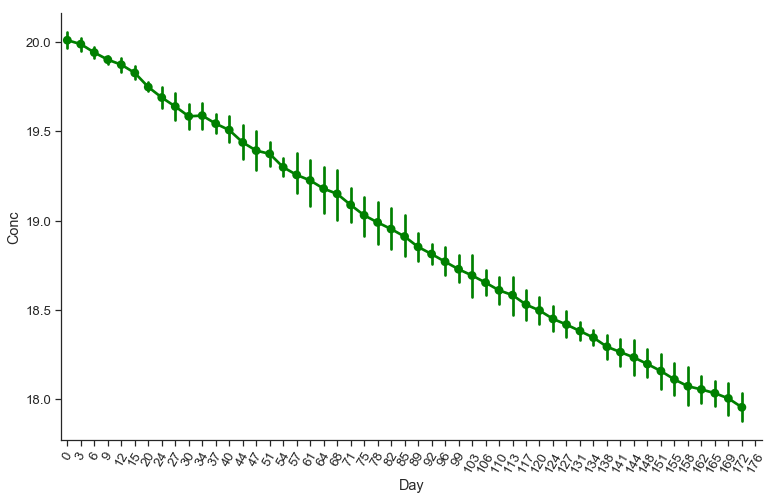

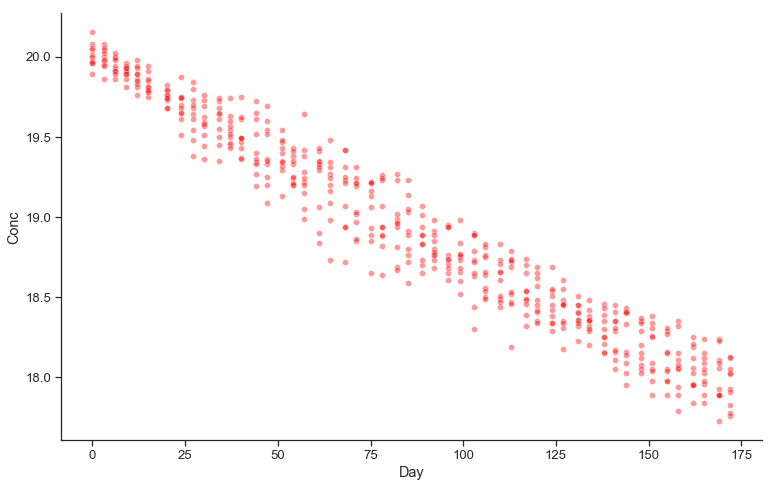

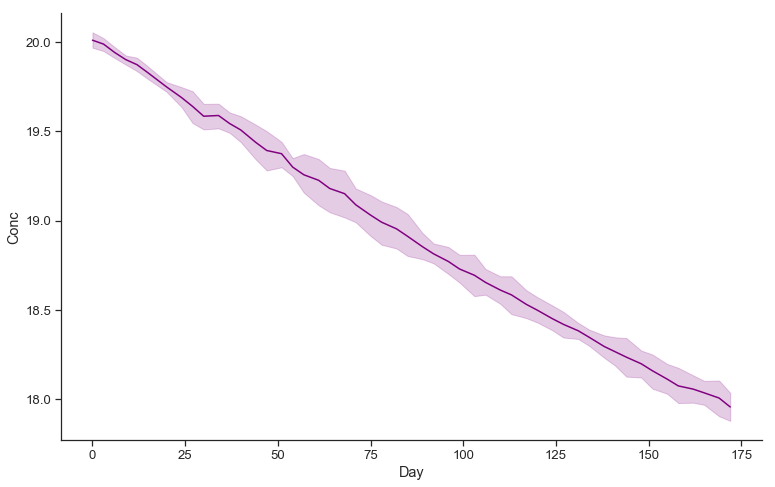

In [177]:
sns.set(font_scale=1.2)
sns.set_style('ticks')
sns.catplot(data=df, x="Day", y="Conc", kind="point", color='green', height=7, aspect=11/7)
import pylab as pl
pl.xticks(rotation = 60)
plt.savefig("Stability 25_2")
sns.relplot(data=df, x="Day", y="Conc", alpha=0.4, color='red', height=7, aspect=11/7)
plt.savefig("Stability 25_1")
sns.relplot(data=df, x="Day", y="Conc", kind="line", color='purple', height=7, aspect=11/7)

In [166]:
df1=pd.read_csv("C:\\PyScripts\\SLK_c.csv")
df2=pd.read_csv("C:\\PyScripts\\SLKb.csv")
df3=pd.read_csv("C:\\PyScripts\\SLKc.csv")
df4=pd.read_csv("C:\\PyScripts\\SLKd.csv")
df5=pd.read_csv("C:\\PyScripts\\SLKe.csv")

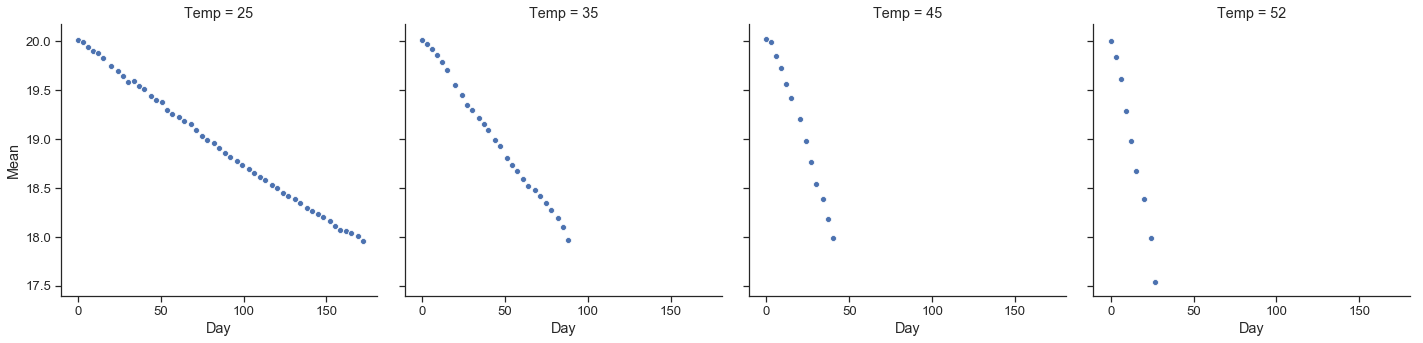

In [167]:
import pylab as pl
sns.relplot(data=df1, x="Day", y="Mean", col="Temp")
plt.rcParams["axes.labelsize"] = 14


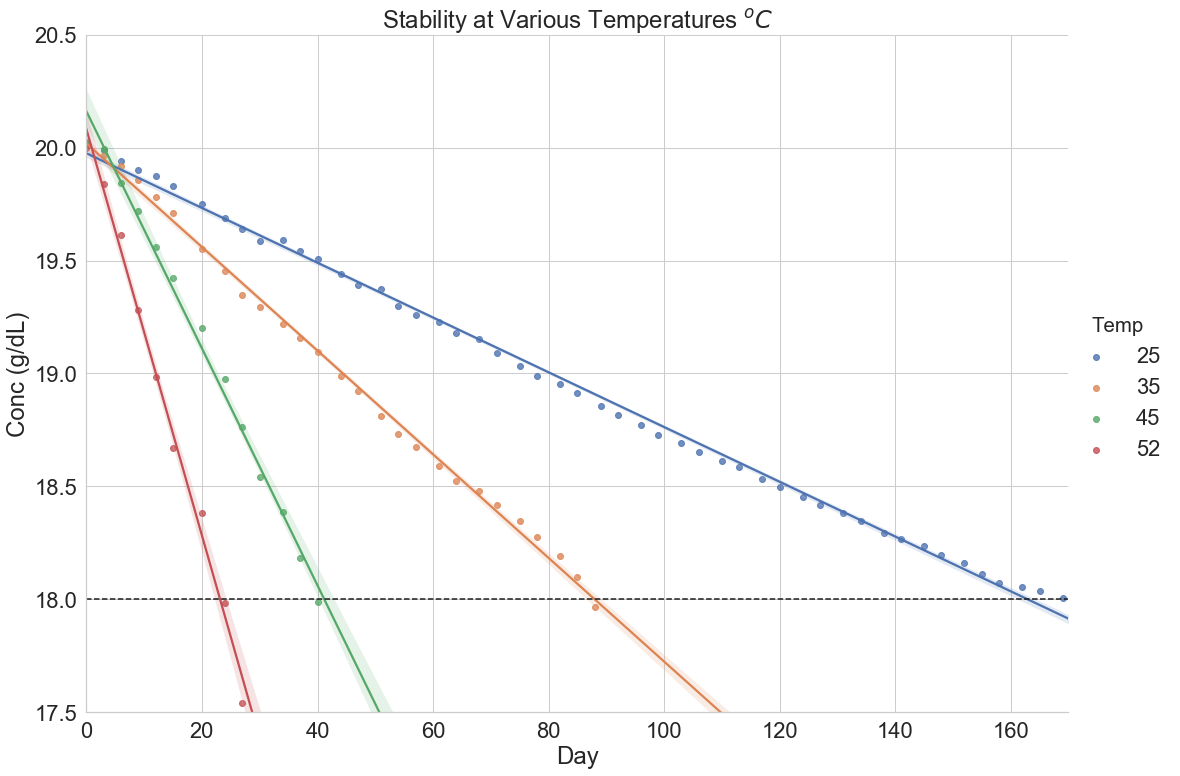

In [170]:
sns.lmplot(data=df1, x="Day", y="Mean", hue="Temp", height=11, aspect=11/8)
sns.set(font_scale=2)
sns.set_style('whitegrid')
ax=plt.gca()
ax.set_title("Stability at Various Temperatures $^{o}C$")
ax.set(xlabel = 'Day', ylabel = 'Conc (g/dL)', ylim=(17.5,20.5), xlim=(0, 170))
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.labelsize"] = 24
threshold=18.0
ax.plot([0,554],[threshold, threshold], "k--")
plt.savefig("Arrhenius1")

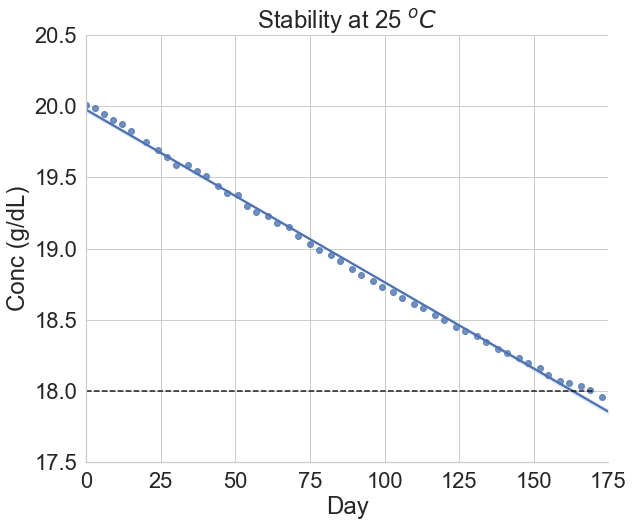

In [171]:
sns.lmplot(data=df2, x="Day", y="Mean")
ax=plt.gca()
ax.set_title("Stability at 25 $^{o}C$")
ax.set(xlabel = 'Day', ylabel = 'Conc (g/dL)', ylim=(17.5,20.5), xlim=(0, 175))
plt.rcParams["axes.labelsize"] = 18
threshold=18.0
ax.plot([0,170],[threshold, threshold], "k--")
plt.gcf().set_size_inches(11.7,8.7)

In [156]:
# a is gradient, b is intercept and c is desired value (In our case this is 18) 
def end_point(a,b,c):
    days = ((b-c)/-a)
    print ("No. of Days to c is :", days)
    return days
    
x=df2['Day']
y=df2['Mean']
stats.pearsonr(x,y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r-squared: %f" % r_value**2)
print("p-Value: %f   SEM: %f" % (p_value, std_err))
end_point(slope, intercept, 18)

slope: -0.012097    intercept: 19.973643
r-squared: 0.997208
p-Value: 0.000000   SEM: 0.000091
No. of Days to c is : 163.15580929526823


163.15580929526823

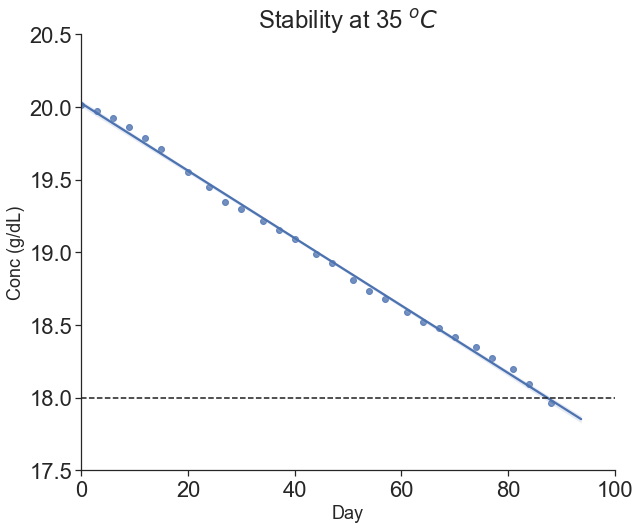

In [157]:
sns.lmplot(data=df3, x="Day", y="Mean")
ax=plt.gca()
ax.set_title("Stability at 35 $^{o}C$")
ax.set(xlabel = 'Day', ylabel = 'Conc (g/dL)', ylim=(17.5,20.5), xlim=(0, 100))
plt.rcParams["axes.labelsize"] = 18
threshold=18.0
ax.plot([0,124],[threshold, threshold], "k--")
plt.gcf().set_size_inches(11.7,8.7)

In [158]:
def end_point(a,b,c):
    days = ((b-c)/-a)
    print ("No. of Days to c is :", days)
    return days
    
x=df3['Day']
y=df3['Mean']
stats.pearsonr(x,y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r-squared: %f" % r_value**2)
print("p-Value: %f   SEM: %f" % (p_value, std_err))
end_point(slope, intercept, 18)

slope: -0.023182    intercept: 20.023974
r-squared: 0.997919
p-Value: 0.000000   SEM: 0.000212
No. of Days to c is : 87.3071546842197


87.3071546842197

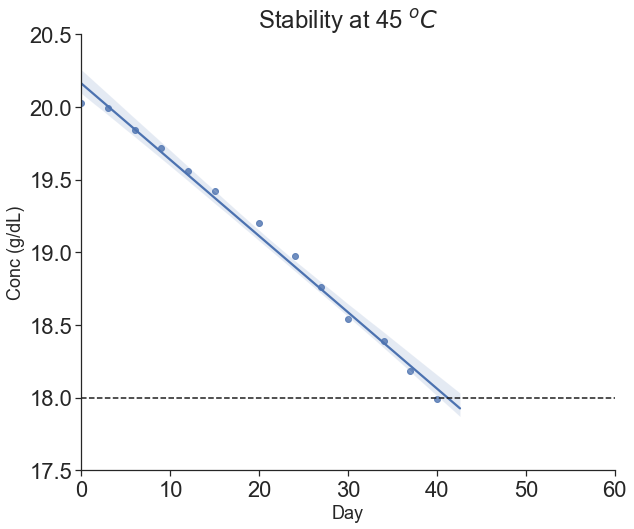

In [159]:
sns.lmplot(data=df4, x="Day", y="Mean")
ax=plt.gca()
ax.set_title("Stability at 45 $^{o}C$")
ax.set(xlabel = 'Day', ylabel = 'Conc (g/dL)', ylim=(17.5,20.5), xlim=(0, 60))
plt.rcParams["axes.labelsize"] = 18
threshold=18.0
ax.plot([0,124],[threshold, threshold], "k--")
plt.gcf().set_size_inches(11.7,8.7)

In [160]:
def end_point(a,b,c):
    days = ((b-c)/-a)
    print ("No. of Days to c is :", days)
    return days
    
x=df4['Day']
y=df4['Mean']
stats.pearsonr(x,y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("r-squared: %f" % r_value**2)
print("p-Value: %f   SEM: %f" % (p_value, std_err))
end_point(slope, intercept, 18)

slope: -0.052463    intercept: 20.160220
r-squared: 0.992322
p-Value: 0.000000   SEM: 0.001391
No. of Days to c is : 41.17645791807545


41.17645791807545

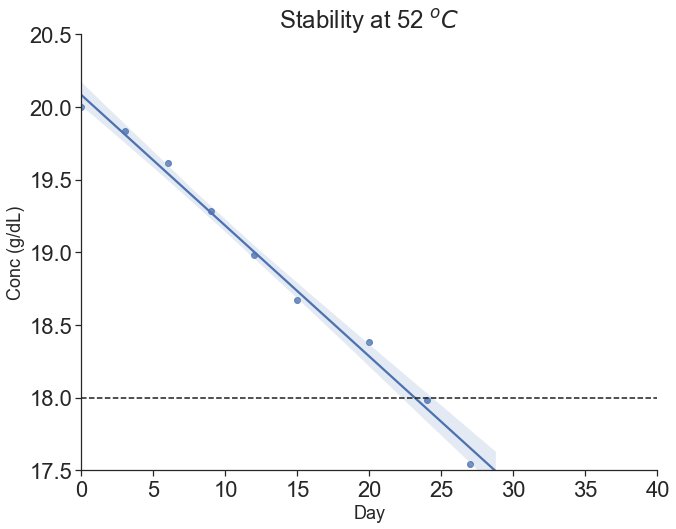

In [161]:
sns.lmplot(data=df5, x="Day", y="Mean")
ax=plt.gca()
ax.set_title("Stability at 52 $^{o}C$")
ax.set(xlabel = 'Day', ylabel = 'Conc (g/dL)', ylim=(17.5,20.5), xlim=(0, 40))
plt.rcParams["axes.labelsize"] = 18
threshold=18.0
ax.plot([0,124],[threshold, threshold], "k--")
plt.gcf().set_size_inches(11.7,8.7)

In [162]:
def end_point(a,b,c):
    days = ((b-c)/-a)
    print ("No. of Days to c is :", days)
    return days
    
x=df5['Day']
y=df5['Mean']
stats.pearsonr(x,y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("p-Value: %f   SEM: %f" % (p_value, std_err))
print("r-squared: %f" % r_value**2)
end_point(slope, intercept, 18)

slope: -0.089935    intercept: 20.081050
p-Value: 0.000000   SEM: 0.002961
r-squared: 0.992471
No. of Days to c is : 23.139513484428104


23.139513484428104

slope: 7.066380    intercept: -18.568389
p-Value: 0.003069   SEM: 0.392358
r-squared: 0.993872


3.558718861209964

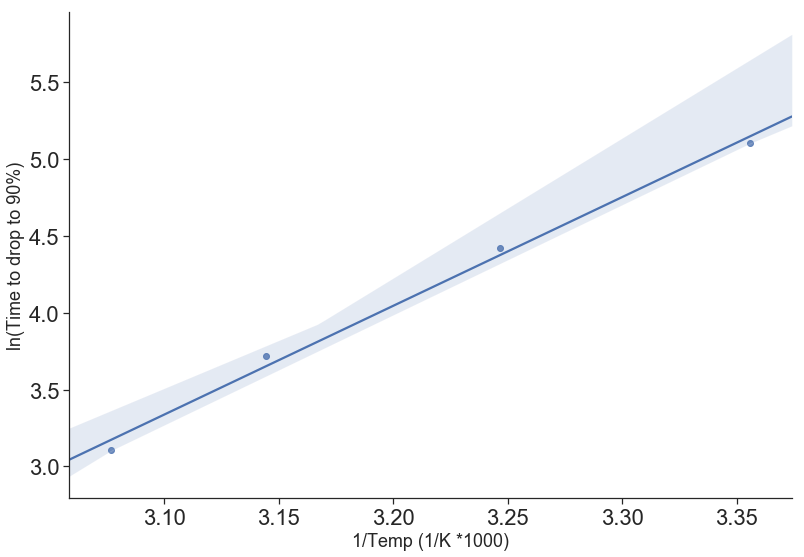

In [163]:
df6=pd.read_csv("C:\\Pyscripts\\Arr3.csv")
import math
fig=sns.lmplot(data=df6, x= '1/K', y='lnT90', height=8.27, aspect=11.7/8.27)
fig.set(xlabel='1/Temp (1/K *1000)', ylabel= 'ln(Time to drop to 90%)')
y=df6['lnT90']
x=df6['1/K']
stats.pearsonr(x,y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("p-Value: %f   SEM: %f" % (p_value, std_err))
print("r-squared: %f" % r_value**2)


def desiredtemp(a):
    invt = 1/a*1000
    return invt

desiredtemp(281)



In [121]:
def lnshelflife(a,b,c):
    lndays = (a*b+c)
    print ("No. of  ln(days) to a is:", lndays)
    return lndays

lnshelflife(3.558718861209964, slope, intercept)
shelflifes = math.exp(6.578871809878802)
print(shelflifes)

No. of  ln(days) to a is: 6.578871809878802
719.7268822794633
